<a href="https://colab.research.google.com/github/ProdKEYMON/Data_keymon/blob/main/TextMining_04_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M.L/datas/boston.csv')
raw.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [13]:
df = raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, r2_score

In [15]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [16]:
# 독립변수, 종속변수(지도학습: 가격(y) 존재하기 대문 )

y = df['medv']
x = df.drop(['medv'], axis = 1)

print(x)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [17]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [19]:
# 훈련용/ 테스트 데이터 분리

x_train, x_test, y_train, y_test =\
train_test_split(x,y, test_size = 0.3, random_state= 42)

In [20]:
# 모델링 (선형회귀 모델)
lr = LinearRegression()

In [21]:
# 모델 훈련(반드시, 훈련용 데이터로 모델 구축)
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
# 모델 성능 평가(테스트 데이터로 예측 수행)
# >> 예측 결과 y_pred 구하기

y_pred = lr.predict(x_test)

In [23]:
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

In [24]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: medv, Length: 152, dtype: float64

In [30]:
#회귀분석 평가 지표(mse, rmse, mae / 결젱계수 r2_square)

mse = mean_squared_error(y_test, y_pred)
# y_test : 실 데이터, y_pred: 예측 데이터
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print('MSE: %0.2f'%mse) # 평균제곱오차
print('RMSE: %0.2f'%rmse) # 평균제곱근오차
print('MAE: %0.2f'%mae) # 평균절대오차

MSE: 21.52
RMSE: 4.64
MAE: 3.16


In [34]:
r2 = round(r2_score(y_test, y_pred), 2)
print('결정계수(r2 score):', r2)
# 결정계수(설명력): 회귀모델이 데이터에 대해 71% 설명함

결정계수(r2 score): 0.71


In [41]:
print('y절편:', round(lr.intercept_, 2))

y절편: 31.63


In [40]:
print('회귀계수 값:', np.round(lr.coef_, 2))

회귀계수 값: [-1.300e-01  4.000e-02  5.000e-02  3.120e+00 -1.542e+01  4.060e+00
 -1.000e-02 -1.390e+00  2.400e-01 -1.000e-02 -9.100e-01  1.000e-02
 -5.500e-01]


In [42]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [43]:
# 회귀식
#y_pred('가격') = -1.300e-01 crim + 4.000e-02 zn + ...... + 31.63(y절편)

In [44]:
pd.Series(data = np.round(lr.intercept_, 2), index=x.columns)

crim       31.63
zn         31.63
indus      31.63
chas       31.63
nox        31.63
rm         31.63
age        31.63
dis        31.63
rad        31.63
tax        31.63
ptratio    31.63
b          31.63
lstat      31.63
dtype: float64

In [46]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=x.columns)
coef.sort_values(ascending=False)

rm          4.06
chas        3.12
rad         0.24
indus       0.05
zn          0.04
b           0.01
age        -0.01
tax        -0.01
crim       -0.13
lstat      -0.55
ptratio    -0.91
dis        -1.39
nox       -15.42
dtype: float64

In [49]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

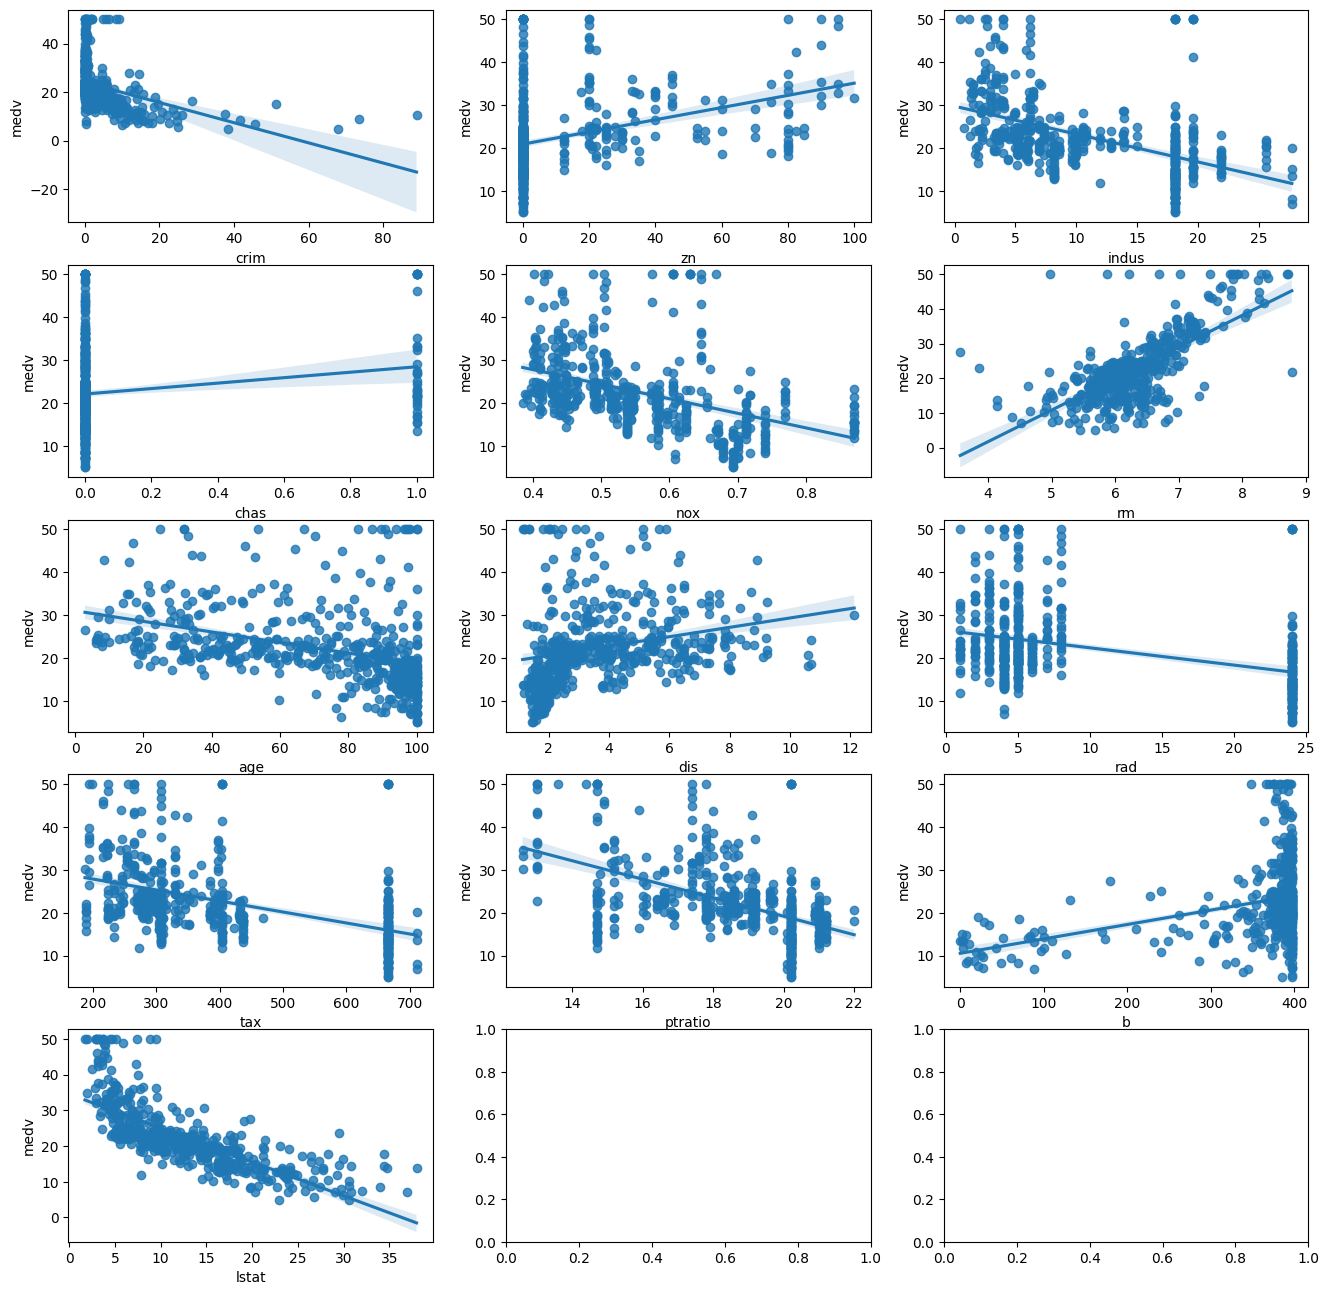

In [50]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,16), ncols = 3, nrows = 5)

x_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

for i, feature in enumerate(x_features):
    row =int(i/3)
    col = i%3
    sns.regplot(x=feature, y = 'medv', data=df, ax=ax[row][col])

plt.show()

In [51]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M.L/datas/auto_mpg.csv')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625,18.6,82,1,ford ranger
